In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
from matplotlib.animation import FuncAnimation, FFMpegWriter
from itertools import product

In [5]:
def build_adjacency(length):
    # now we want to create a couple of graphs. In practice, we start setting the number of nodes for each graph.


    # for each couple of nodes in a graph we generate a random natural number between 0 and 100.

    matrix = np.zeros((length, length))



    # we also want our graphs to be representative of reality (i.e. graphs are usually sparse).

    for i in range(length):
        for j in range(i):
            rnd = np.random.randint(1, 101)
            unif = np.random.rand()
            if unif > 0.6:
                matrix[i][j] = rnd
                matrix[j][i] = rnd
            else:
                matrix[i][j] = 0
                matrix[j][i] = 0


    return matrix

    # each row is a node, for a fixed row each column is another node, and the number is the edge's values.

def build_measure(matrix):


    # now we want to give a weight to each node in each matrix.
    # in particulare if a node has a lot of connections, it should have a weight which is linear wrt the sum of its edges.

    M = []
    length = matrix.shape[0]

    for i in range(length):
        s = sum(matrix[i,:])
        M.append(s)
    M = M/sum(M)

   
    return M

def build_similitude_matrices(matrix):    
   
    # this are matrices which represent the similitude between nodes.

    C = 1/(1 + matrix)

    return C

import numpy as np

def make_noise(matrix, noise_level=0.0001):
    """
    Introduces noise into the adjacency matrix.
   
    Args:
        matrix (numpy.ndarray): The original adjacency matrix.
        noise_level (float): The probability of modifying an existing edge or adding a new one (default 0.1).
   
    Returns:
        numpy.ndarray: The new adjacency matrix with added noise.
    """
    # creare a copy of the matrix to avoid altering the original.
    noisy_matrix = matrix.copy()
    length = noisy_matrix.shape[0]
   
    # iterate over the lower triangular part of the matrix (to maintain symmetry).
    for i in range(length):
        for j in range(i):
            unif = np.random.rand()
           
            if noisy_matrix[i][j] > 0:  # if there is already an edge.
                # with probability `noise_level`, change the edge's value.
                if unif < noise_level:
                    noisy_matrix[i][j] = np.random.randint(1, 101)
                    noisy_matrix[j][i] = noisy_matrix[i][j]  # ensure symmetry.
            else:  # if there is no edge.
                # with probability `noise_level`, add a new edge.
                if unif < noise_level:
                    rnd = np.random.randint(1, 101)
                    noisy_matrix[i][j] = rnd
                    noisy_matrix[j][i] = rnd  # ensure symmetry.
   
    return noisy_matrix

def print_embeddings_one(embed_s, embed_t, Labels = False):

    matrix = embed_s

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')

    x = matrix[0, :]
    y = matrix[1, :]
    z = matrix[2, :]

    ax.scatter(x, y, z, color='r',marker='o')

    x2=embed_t[0,:]
    y2 = embed_t[1,:]
    z2 = embed_t[2,:]
    ax.scatter(x2,y2,z2, color='b',marker='o')

    if Labels: 
        for i in range(x.shape[0]):
            ax.text(x[i],y[i],z[i], f"{i}", color = 'r')
        for j in range(x2.shape[0]):
            ax.text(x2[j],y2[j],z2[j],f"{j}", color = 'b')
            


    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(["S","T"])
    ax.set_title('Plot of the Embeddings')

    plt.show()

def create_embeddings_animation(embed_s_history, embed_t_history, output_path="embedding_animation.mp4", fps=2):
    """
    Creates an animation of embeddings over iterations, dynamically adjusting the view.

    Parameters:
    - embed_s_history (list of np.ndarray): List of `embed_s` embeddings (one for each iteration).
    - embed_t_history (list of np.ndarray): List of `embed_t` embeddings (one for each iteration).
    - output_path (str): Path to save the animation file (e.g., .mp4 or .gif).
    - fps (int): Frames per second for the video.
    """
    # creare a 3D figure.
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # initialize empty scatter plots for source and target embeddings.
    scatter_s = ax.scatter([], [], [], color='r', marker='o', label='Source')
    scatter_t = ax.scatter([], [], [], color='b', marker='o', label='Target')

    # add a legend.
    ax.legend()
    title = ax.set_title("Embedding Evolution")

    def update(frame):
        """
        Update the scatter plot and axes limits for each animation frame.
        """
        # get embeddings for the current frame.
        embed_s = embed_s_history[frame]
        embed_t = embed_t_history[frame]

        # dynamically calculate axis limits based on current embeddings.
        all_points = np.hstack([embed_s, embed_t])
        x_min, x_max = all_points[0, :].min() - 1, all_points[0, :].max() + 1
        y_min, y_max = all_points[1, :].min() - 1, all_points[1, :].max() + 1
        z_min, z_max = all_points[2, :].min() - 1, all_points[2, :].max() + 1

        ax.set_xlim([x_min, x_max])
        ax.set_ylim([y_min, y_max])
        ax.set_zlim([z_min, z_max])

        # update the scatter plots with the current embeddings.
        scatter_s._offsets3d = (embed_s[0, :], embed_s[1, :], embed_s[2, :])
        scatter_t._offsets3d = (embed_t[0, :], embed_t[1, :], embed_t[2, :])

        # update the title to reflect the current iteration.
        title.set_text(f"Embedding Evolution - Iteration {frame + 1}")

        return scatter_s, scatter_t, title

    # create the animation.
    ani = FuncAnimation(fig, update, frames=len(embed_s_history), interval=1000 // fps, blit=False)

    # save the animation as an MP4 or GIF file.
    writer = FFMpegWriter(fps=fps, metadata=dict(artist='Me'), bitrate=1800)
    ani.save(output_path, writer=writer)

    # close the figure.
    plt.close(fig)




import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.animation import FuncAnimation

def create_embeddings_animation_2(embed_s_history, embed_t_history, output_path="embedding_animation.mp4", fps=2):
    """
    Creates an animation of embeddings over iterations, dynamically adjusting the view and adding fixed labels.

    Parameters:
    - embed_s_history (list of np.ndarray): List of `embed_s` embeddings (one for each iteration).
    - embed_t_history (list of np.ndarray): List of `embed_t` embeddings (one for each iteration).
    - output_path (str): Path to save the animation file (e.g., .mp4 or .gif).
    - fps (int): Frames per second for the video.
    """
    # creare una figura 3D.
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # inizializzare scatter plot vuoti.
    scatter_s = ax.scatter([], [], [], color='r', marker='o', label='Source')
    scatter_t = ax.scatter([], [], [], color='b', marker='o', label='Target')

    # aggiungere legenda.
    ax.legend()
    title = ax.set_title("Embedding Evolution")

    # lista per salvare le etichette.
    text_labels_s = []
    text_labels_t = []

    def update(frame):
        """
        Update scatter plot, axis limits, and labels for each animation frame.
        """
        nonlocal text_labels_s, text_labels_t  # refer to the outer lists.

        # cancellare le etichette precedenti.
        for text in text_labels_s + text_labels_t:
            text.remove()
        text_labels_s = []
        text_labels_t = []

        # ottenere embeddings per il frame corrente.
        embed_s = embed_s_history[frame]
        embed_t = embed_t_history[frame]

        # calcolare dinamicamente i limiti degli assi.
        all_points = np.hstack([embed_s, embed_t])
        x_min, x_max = all_points[0, :].min() - 1, all_points[0, :].max() + 1
        y_min, y_max = all_points[1, :].min() - 1, all_points[1, :].max() + 1
        z_min, z_max = all_points[2, :].min() - 1, all_points[2, :].max() + 1

        ax.set_xlim([x_min, x_max])
        ax.set_ylim([y_min, y_max])
        ax.set_zlim([z_min, z_max])

        # aggiornare scatter plot con embeddings correnti.
        scatter_s._offsets3d = (embed_s[0, :], embed_s[1, :], embed_s[2, :])
        scatter_t._offsets3d = (embed_t[0, :], embed_t[1, :], embed_t[2, :])

        # aggiungere etichette ai punti (con numeri fissi).
        for i in range(embed_s.shape[1]):
            text_labels_s.append(
                ax.text(embed_s[0, i], embed_s[1, i], embed_s[2, i], f"{i}", color='red', fontsize=8)
            )
        for i in range(embed_t.shape[1]):
            text_labels_t.append(
                ax.text(embed_t[0, i], embed_t[1, i], embed_t[2, i], f"{i}", color='blue', fontsize=8)
            )

        # aggiornare il titolo per riflettere l'iterazione corrente.
        title.set_text(f"Embedding Evolution - Iteration {frame + 1}")

        return scatter_s, scatter_t, title, *text_labels_s, *text_labels_t

    # creare l'animazione.
    anim = FuncAnimation(fig, update, frames=len(embed_s_history), interval=1000 / fps)

    # salvare l'animazione in un file.
    anim.save(output_path, writer='ffmpeg', fps=fps)
    print(f"Animation saved to {output_path}")







def GWL_simple_2(C_s, C_t, M_s, M_t, hyper, noise):
    """
    Simplified Gromov-Wasserstein Learning (GWL) with entropy-regularized cost, embedding updates,
    and regularization R(X_s, X_t).
   
    Parameters:
    - C_s: Cost matrix for source graph (length_s x length_s).
    - C_t: Cost matrix for target graph (length_t x length_t).
    - M_s: Marginal distribution for source graph (length_s,).
    - M_t: Marginal distribution for target graph (length_t,).
    - beta: Regularization parameter for Sinkhorn iterations.
    - gamma: Regularization parameter for entropy term.
    - alpha: Weight for embedding-level cost regularization.
    - d: Dimension of the embeddings.
    - inner_n: Number of inner Sinkhorn iterations.
    - outer_n: Number of outer embedding updates.
    - lambda_reg: Regularization weight for R(X_s, X_t).
    """

    beta = hyper["beta"]
    gamma = hyper["gamma"]
    d = hyper["d"]
    inner_n = hyper["inner_n"]
    outer_n = hyper["outer_n"]
    lambda_reg = hyper["lambda_reg"]

   
    length_s, length_t = C_s.shape[0], C_t.shape[0]

    # initialize embeddings.
    embed_s = np.random.rand(d, length_s) * 5
    # embed_t = np.random.rand(d, length_t) * 5
    noise = np.random.normal(loc=0, scale = noise, size=length_s)
    embed_t = embed_s + noise
    print(embed_s, "AAA \n \n", embed_t)
    # for the animation.
    embed_s_history = []
    embed_t_history = []


    # initialize transport matrix.
    T = np.outer(M_s, M_t)

    for m in range(outer_n):
        alpha_m = m / outer_n  # gradual interpolation weight.

        embed_s_history.append(embed_s.copy())
        embed_t_history.append(embed_t.copy())

        # inner loop: pdate transport matrix T using entropy regularization.
        for n in range(inner_n):
            # compute embedding-level cost.
            K_embed = np.zeros((length_s, length_t))
            for i in range(length_s):
                for j in range(length_t):
                    # if L2.
                    K_embed[i, j] = np.sum((embed_s[:, i] - embed_t[:, j]) ** 2)
                    # if cosine.
                    # K_embed [i,j]= 1 - np.exp(-10*(1 - np.dot(embed_s[:, i], embed_t[:,j])/(np.linalg.norm(embed_s[:,i])*np.linalg.norm(embed_t[:,j]))))


            # compute graph-level cost.
            graph_cost = C_s @ T @ C_t.T
            C_mn = graph_cost + alpha_m * K_embed + gamma

            # add entropy regularization term.
            C_reg = C_mn - gamma * np.log(T + 1e-8)
           
            # sinkhorn update.
            kernel = np.exp(-C_reg / beta)
            a = np.ones(length_s)
            for _ in range(inner_n):
                b = M_t / (kernel.T @ a)
                a = M_s / (kernel @ b)

            T = np.diag(a) @ kernel @ np.diag(b)

        # update embeddings by minimizing α_m <K(X_s, X_t), T> + β R(X_s, X_t).
        for _ in range(10):  # gradient descent steps.
            # compute gradients of K(X_s, X_t).
            grad_s = np.zeros_like(embed_s)
            grad_t = np.zeros_like(embed_t)
            for i in range(length_s):
                for j in range(length_t):
                    grad_s[:, i] += 2 * T[i, j] * (embed_s[:, i] - embed_t[:, j])
                    grad_t[:, j] += 2 * T[i, j] * (embed_t[:, j] - embed_s[:, i])

            # add gradients of R(X_s, X_t).
            for i in range(length_s):
                for j in range(length_s):
                    grad_s[:, i] += lambda_reg * 4 * ((np.sum((embed_s[:, i] - embed_s[:, j]) ** 2) - C_s[i, j]) *
                                                      (embed_s[:, i] - embed_s[:, j]))

            for i in range(length_t):
                for j in range(length_t):
                    grad_t[:, i] += lambda_reg * 4 * ((np.sum((embed_t[:, i] - embed_t[:, j]) ** 2) - C_t[i, j]) *
                                                      (embed_t[:, i] - embed_t[:, j]))

            # gradient descent step.
            embed_s -= alpha_m * grad_s
            embed_t -= alpha_m * grad_t

        # # #print_embeddings_one(embed_s, embed_t)

    # compute final loss.
    final_cost = np.sum(T * C_mn)
    entropy = -np.sum(T * np.log(T + 1e-8))
    total_loss = final_cost - gamma * entropy


    # graph matching.
    correspondence = np.zeros_like(T)
    for i in range(length_s):
        max_idx = np.argmax(T[i, :])
        correspondence[i, max_idx] = 1


    # print_embeddings_video(embed_s, embed_t)
   

    return embed_s, embed_t, T, correspondence, total_loss, embed_s_history, embed_t_history



def build_barabasi_sp(n):
    G = nx.barabasi_albert_graph(n,1,seed = 43)
    SP= dict(nx.shortest_path_length(G))
    for u in G.nodes():
        for v in G.nodes():
            if u != v :
                G.add_edge(u,v,weight = 1 / (SP[u][v] + 1))
    m= nx.adjacency_matrix(G).todense()
    return m



def build_barabasi_random(n):
    G = nx.barabasi_albert_graph(n,1,seed = 43)
    for (u,v) in G.edges():
        w = np.random.randint(0,5)
        G.edges()[u,v]["weight"] = w
    m= nx.adjacency_matrix(G).todense()
    return m


def makenoise_2(m, I, A, delta):
    m = np.array(m)
    G = nx.from_numpy_array(m)
    G2 = nx.Graph()
    G2.add_nodes_from(G.nodes())
    G2.add_edges_from(G.edges())
    l = len(G.nodes())
    K = len(G.edges())
    for i in range(l):
        for j in range(i):
            w = np.random.randint(0,I)
            if (i,j) in G.edges():
                G.edges()[(i,j)]["weight"] = G.edges()[(i,j)]["weight"]+w

    surplus = int(l* delta)
    for i in range(surplus):
        G2.add_node(l+i)
        for a in range(int(K/l)):
            k = np.random.randint(0,l-1)
            w = np.random.randint(0,A)
            G2.add_edge(l+i,k,weight=w)

    m2 = nx.adjacency_matrix(G2)

    return m2




##############################################################################################################

def hyperparameter_optimization(C_s, C_t, M_s, M_t, hyper_ranges, noise):
    """
    Perform hyperparameter optimization using a grid search.

    Args:
        C_s (ndarray): Source cost matrix.
        C_t (ndarray): Target cost matrix.
        M_s (ndarray): Source marginal distribution.
        M_t (ndarray): Target marginal distribution.
        hyper_ranges (dict): Ranges for the hyperparameters to optimize.
            Example: {"beta": [1, 10, 100], "gamma": [0.1, 1, 10], "d": [2, 3, 5]}
        noise (float): Noise level for embeddings.

    Returns:
        dict: Best hyperparameters and their corresponding total loss.
    """
    best_loss = float('inf')
    best_hyperparams = {}
    results = []

    # Generate all combinations of hyperparameter values
    keys, values = zip(*hyper_ranges.items())
    combinations = list(product(*values))

    for combination in combinations:
        # Map the combination to hyperparameter names
        hyper = dict(zip(keys, combination))

        # Perform GWL with the current hyperparameters
        _, _, _, _, total_loss, _, _ = GWL_simple_2(C_s, C_t, M_s, M_t, hyper, noise)

        # Save the result
        results.append({"hyperparameters": hyper, "loss": total_loss})

        # Update the best hyperparameters if current loss is lower
        if total_loss < best_loss:
            best_loss = total_loss
            best_hyperparams = hyper

        print(f"Tested hyperparameters: {hyper}, Total loss: {total_loss}")

    print(f"Best hyperparameters: {best_hyperparams}, Best loss: {best_loss}")
    return {"best_hyperparameters": best_hyperparams, "best_loss": best_loss, "results": results}
def adj_matrix_sp(G):
    SP = dict(nx.shortest_path_length(G))
    for u in G.nodes():
        for v in G.nodes():
            if ( u != v):
                G.add_edge(u,v,weight = 1/(SP[u][v]+1))
    m = nx.adjacency_matrix(G).todense()
    return m

def noise_sp(G, q, s):
    # The graph G SHOULD BE ONLY TOPOLOGICAL, NO WEIGHTS
    # q is the noise
    # s number of edges to every node that I add
    G2 = nx.Graph()
    G2.add_nodes_from(G.nodes())
    G2.add_edges_from(G.edges())
    l = len(G.nodes())
    L = len(G.edges())
    surplus = int(l*q)
    for i in range(surplus):
        G2.add_node(l+i)
        for a in range(int(s)):
            k = np.random.randint(0,l)
            G2.add_edge(l+i,k)

    return G2

In [3]:
def GWL_simple_3(C_s, C_t, M_s, M_t, emb_s , emb_t, hyper):
    """
    Simplified Gromov-Wasserstein Learning (GWL) with entropy-regularized cost, embedding updates,
    and regularization R(X_s, X_t).
   
    Parameters:
    - C_s: Cost matrix for source graph (length_s x length_s).
    - C_t: Cost matrix for target graph (length_t x length_t).
    - M_s: Marginal distribution for source graph (length_s,).
    - M_t: Marginal distribution for target graph (length_t,).
    - beta: Regularization parameter for Sinkhorn iterations.
    - gamma: Regularization parameter for entropy term.
    - alpha: Weight for embedding-level cost regularization.
    - d: Dimension of the embeddings.
    - inner_n: Number of inner Sinkhorn iterations.
    - outer_n: Number of outer embedding updates.
    - lambda_reg: Regularization weight for R(X_s, X_t).
    """

    beta = hyper["beta"]
    gamma = hyper["gamma"]
    d = hyper["d"]
    inner_n = hyper["inner_n"]
    outer_n = hyper["outer_n"]
    lambda_reg = hyper["lambda_reg"]

   
    length_s, length_t = C_s.shape[0], C_t.shape[0]

    # initialize embeddings.
    embed_s = emb_s
    # embed_t = np.random.rand(d, length_t) * 5
    #noise = np.random.normal(loc=0, scale = noise, size=length_s)
    embed_t = emb_t
    # for the animation.
    embed_s_history = []
    embed_t_history = []


    # initialize transport matrix.
    T = np.outer(M_s, M_t)

    for m in range(outer_n):
        alpha_m = m / outer_n  # gradual interpolation weight.

        embed_s_history.append(embed_s.copy())
        embed_t_history.append(embed_t.copy())

        # inner loop: pdate transport matrix T using entropy regularization.
        for n in range(inner_n):
            # compute embedding-level cost.
            K_embed = np.zeros((length_s, length_t))
            for i in range(length_s):
                for j in range(length_t):
                    # if L2.
                    K_embed[i, j] = np.sum((embed_s[:, i] - embed_t[:, j]) ** 2)
                    # if cosine.
                    # K_embed [i,j]= 1 - np.exp(-10*(1 - np.dot(embed_s[:, i], embed_t[:,j])/(np.linalg.norm(embed_s[:,i])*np.linalg.norm(embed_t[:,j]))))


            # compute graph-level cost.
            graph_cost = C_s @ T @ C_t.T
            C_mn = graph_cost + alpha_m * K_embed + gamma

            # add entropy regularization term.
            C_reg = C_mn - gamma * np.log(T + 1e-8)
           
            # sinkhorn update.
            kernel = np.exp(-C_reg / beta)
            a = np.ones(length_s)
            for _ in range(inner_n):
                b = M_t / (kernel.T @ a)
                a = M_s / (kernel @ b)

            T = np.diag(a) @ kernel @ np.diag(b)

        # update embeddings by minimizing α_m <K(X_s, X_t), T> + β R(X_s, X_t).
        for _ in range(10):  # gradient descent steps.
            # compute gradients of K(X_s, X_t).
            grad_s = np.zeros_like(embed_s)
            grad_t = np.zeros_like(embed_t)
            for i in range(length_s):
                for j in range(length_t):
                    grad_s[:, i] += 2 * T[i, j] * (embed_s[:, i] - embed_t[:, j])
                    grad_t[:, j] += 2 * T[i, j] * (embed_t[:, j] - embed_s[:, i])

            # add gradients of R(X_s, X_t).
            for i in range(length_s):
                for j in range(length_s):
                    grad_s[:, i] += lambda_reg * 4 * ((np.sum((embed_s[:, i] - embed_s[:, j]) ** 2) - C_s[i, j]) *
                                                      (embed_s[:, i] - embed_s[:, j]))

            for i in range(length_t):
                for j in range(length_t):
                    grad_t[:, i] += lambda_reg * 4 * ((np.sum((embed_t[:, i] - embed_t[:, j]) ** 2) - C_t[i, j]) *
                                                      (embed_t[:, i] - embed_t[:, j]))

            # gradient descent step.
            embed_s -= alpha_m * grad_s
            embed_t -= alpha_m * grad_t

        # # #print_embeddings_one(embed_s, embed_t)

    # compute final loss.
    final_cost = np.sum(T * C_mn)
    entropy = -np.sum(T * np.log(T + 1e-8))
    total_loss = final_cost - gamma * entropy


    # graph matching.
    correspondence = np.zeros_like(T)
    for i in range(length_s):
        max_idx = np.argmax(T[i, :])
        correspondence[i, max_idx] = 1


    # print_embeddings_video(embed_s, embed_t)
   

    return embed_s, embed_t, T, correspondence, total_loss, embed_s_history, embed_t_history


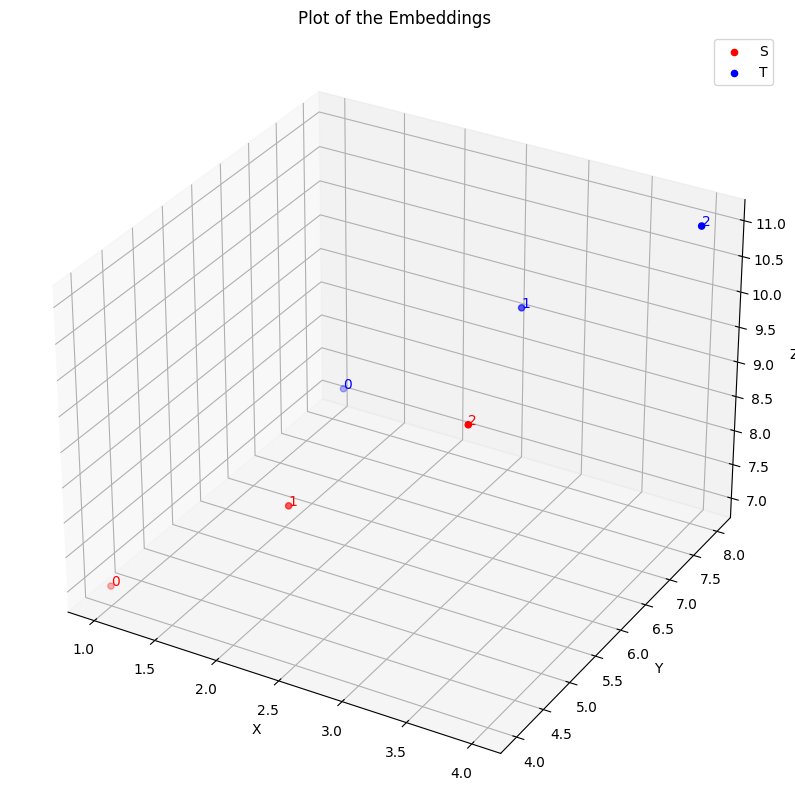

In [6]:
embed_s = np.array([
    [1, 2, 3],  # x-coordinates
    [4, 5, 6],  # y-coordinates
    [7, 8, 9]   # z-coordinates
])

# Embedding T
embed_t = np.array([
    [2, 3, 4],  # x-coordinates
    [6, 7, 8],  # y-coordinates
    [9, 10, 11] # z-coordinates
])

# Call the function with Labels=True
print_embeddings_one(embed_s, embed_t, Labels=True)
